# ECON 220 Lab Week 6

Justin S. Eloriaga

Today, our goal is to illustrate via real data one of the key concepts in all of statistics, called the Central Limit Theorem

We start, as always, by loading the relevant libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

We will be using Electric Car Vehicle Registration Data for the State of Washington. Data was obtained from data.gov. 

In [14]:
path = "/Users/justineloriaga/Documents/GitHub/ECON-220-Lab/Week 6/EV_Data.csv"
data = pd.read_csv(path)
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),103.0,0.0,41.0,186450183
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220.0,0.0,1.0,478093654
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),40.0,0.0,35.0,274800718
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),42.0,0.0,2.0,260758165
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0.0,0.0,15.0,236581355


I currently drive a Tesla, and I bet most EVs in the US are Tesla EVs, but I could be wrong. So, let us try to prove/disprove my claim, and in the process, learn something important in statistics

Let us make a variable called 'Tesla' which is equal to 'yes' if the vehicle is a Tesla EV and 'no' if otherwise

In [16]:
data['Tesla'] = 'no'  # Default value
data.loc[data['Make'] == 'TESLA', 'Tesla'] = 'yes'
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Tesla
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),103.0,0.0,41.0,186450183,no
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),220.0,0.0,1.0,478093654,yes
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),40.0,0.0,35.0,274800718,no
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),42.0,0.0,2.0,260758165,no
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0.0,0.0,15.0,236581355,yes


Let's now see what the prorportion of Tesla vehicles is in the dataset. In here, we see that the dataset is mostly Tesla EVs but not above 50%. 

In [19]:
tesla_proportion = data['Tesla'].value_counts()
tesla_proportion

Tesla
no     132538
yes     99692
Name: count, dtype: int64

We can put this in percentage form using a normalize option

In [20]:
tesla_proportion = data['Tesla'].value_counts(normalize=True)
tesla_proportion

Tesla
no     0.570719
yes    0.429281
Name: proportion, dtype: float64

Hence, the proportion of Tesla EVs in the dataset is 42.9%. Let us assume for the class that this is the population parameter for the proportion.

From here, let us now do one key thing statisticians do, which is $\textbf{sampling}$

In [22]:
# Take a random sample of 10
sample = data.sample(n=10)

# Compute the tesla_proportion for the sample
sample_tesla_proportion = sample['Tesla'].value_counts(normalize=True)
sample_tesla_proportion

Tesla
no     0.6
yes    0.4
Name: proportion, dtype: float64

We many want to use a loop to generate multiple samples

In [27]:
# Initialize an empty list to store the sample proportions
sample_proportions = []

# Loop to generate 1000 different samples of size 10
for _ in range(1000):
    sample = data.sample(n=10)
    sample_tesla_proportion = sample['Tesla'].value_counts(normalize=True).get('yes', 0)
    sample_proportions.append(sample_tesla_proportion)

sample_proportions


[np.float64(0.5),
 np.float64(0.3),
 np.float64(0.4),
 np.float64(0.6),
 np.float64(0.8),
 np.float64(0.3),
 np.float64(0.7),
 np.float64(0.6),
 np.float64(0.3),
 np.float64(0.1),
 np.float64(0.4),
 np.float64(0.4),
 np.float64(0.4),
 np.float64(0.5),
 np.float64(0.3),
 np.float64(0.2),
 np.float64(0.5),
 np.float64(0.5),
 np.float64(0.5),
 np.float64(0.6),
 np.float64(0.6),
 np.float64(0.5),
 np.float64(0.3),
 np.float64(0.5),
 np.float64(0.2),
 np.float64(0.5),
 np.float64(0.5),
 np.float64(0.4),
 np.float64(0.4),
 np.float64(0.5),
 np.float64(0.6),
 np.float64(0.4),
 np.float64(0.5),
 np.float64(0.1),
 np.float64(0.3),
 np.float64(0.6),
 np.float64(0.1),
 np.float64(0.1),
 np.float64(0.5),
 np.float64(0.5),
 np.float64(0.5),
 np.float64(0.4),
 np.float64(0.3),
 np.float64(0.4),
 np.float64(0.5),
 np.float64(0.4),
 np.float64(0.6),
 np.float64(0.5),
 np.float64(0.1),
 np.float64(0.3),
 np.float64(0.4),
 np.float64(0.4),
 0,
 np.float64(0.3),
 np.float64(0.6),
 np.float64(0.6),
 np.fl

From here, let us get the mean sample estimate for the proportion

In [24]:
mean_proportion = np.mean(sample_proportions)

Then, let us plot this mean and visualize the results we got from the loop

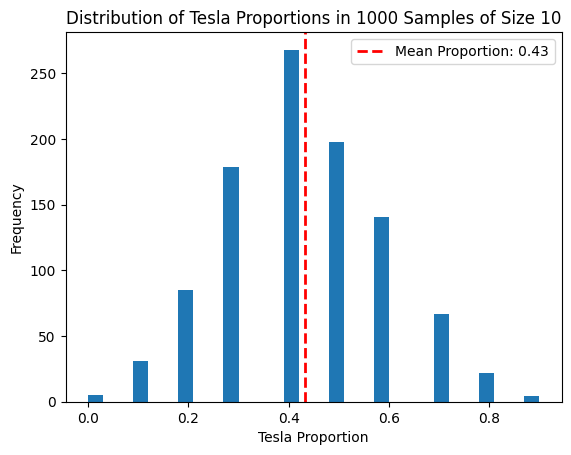

In [25]:
plt.figure()
plt.hist(sample_proportions, bins=30)
plt.axvline(mean_proportion, color='r', linestyle='dashed', linewidth=2, label=f'Mean Proportion: {mean_proportion:.2f}')
plt.xlabel('Tesla Proportion')
plt.ylabel('Frequency')
plt.title('Distribution of Tesla Proportions in 1000 Samples of Size 10')
plt.legend()
plt.show()

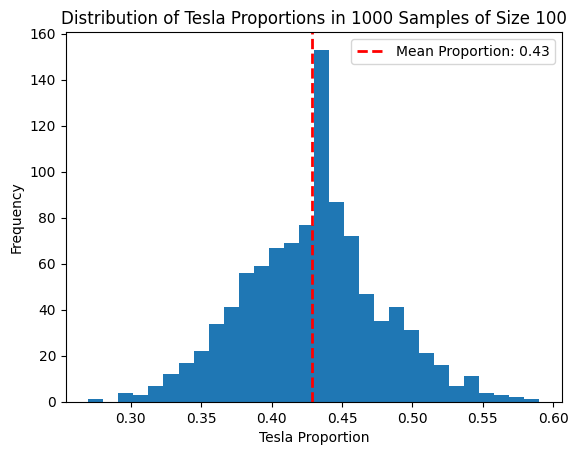

In [28]:
# Initialize an empty list to store the sample proportions
sample_proportions_100 = []

# Loop to generate 1000 different samples of size 100
for _ in range(1000):
    sample = data.sample(n=100)
    sample_tesla_proportion = sample['Tesla'].value_counts(normalize=True).get('yes', 0)
    sample_proportions_100.append(sample_tesla_proportion)

# Compute the mean sample estimate for the proportion
mean_proportion_100 = np.mean(sample_proportions_100)

# Plot the results
plt.figure()
plt.hist(sample_proportions_100, bins=30)
plt.axvline(mean_proportion_100, color='r', linestyle='dashed', linewidth=2, label=f'Mean Proportion: {mean_proportion_100:.2f}')
plt.xlabel('Tesla Proportion')
plt.ylabel('Frequency')
plt.title('Distribution of Tesla Proportions in 1000 Samples of Size 100')
plt.legend()
plt.show()

Suppose my friend, say Wonjun, tells me that he things that the true proportion of Tesla vehicles in the dataset is 50%. We can test his hypothesis using some test

$$H_0: p = 0.50$$
$$H_a: p \neq 0.50$$

The null hypothesis, or $H_0$ represents the status quo assumption, that is, what your friend believes or what prior research had done. The goal of any research endeavor is to test a hypothesis. In this case, I want to test Wonjun's claim that the proportion of Tesla vehicles in the state of Washington is 50%. As the person testing it, I need to find sufficient evidence to reject his claim in order for me to suggest that his claim is not true. To do so, we need to use $\textbf{statistical tests}$. 

For the mean time, let us run a simple test of proportion

In [29]:
from statsmodels.stats.proportion import proportions_ztest

# Number of Tesla vehicles in the dataset
count = data['Tesla'].value_counts().get('yes', 0)

# Total number of vehicles in the dataset
nobs = len(data)

# Hypothesized proportion
value = 0.5

# Perform the z-test
stat, pval = proportions_ztest(count, nobs, value)

# Print the results
print(f"Test Statistic: {stat}")
print(f"P-value: {pval}")

# Determine if we reject the null hypothesis
alpha = 0.05
if pval < alpha:
    print("Reject the null hypothesis: The proportion of Tesla vehicles is significantly different from 0.5")
else:
    print("Fail to reject the null hypothesis: The proportion of Tesla vehicles is not significantly different from 0.5")
    

Test Statistic: -68.85116500143549
P-value: 0.0
Reject the null hypothesis: The proportion of Tesla vehicles is significantly different from 0.5
